In [1]:
from google.colab import files
uploaded = files.upload()
# A button will appear — click it and select your CSV

Saving archive (4).zip to archive (4) (1).zip


In [4]:
import zipfile
import os

# Extract
with zipfile.ZipFile('archive (4) (1).zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Find all CSV files
csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
print(csv_files)

['Sample - Superstore.csv']


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the data (replace filename with yours)
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')

# Explore
print(df.shape)        # how many rows & columns
print(df.columns)      # column names
df.head()              # first 5 rows

(9994, 21)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# Convert date column to proper date format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort by date
df = df.sort_values('Order Date')

# Group sales by month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].astype(str)

print(monthly_sales.head(10))

  Order Date       Sales
0    2014-01  14236.8950
1    2014-02   4519.8920
2    2014-03  55691.0090
3    2014-04  28295.3450
4    2014-05  23648.2870
5    2014-06  34595.1276
6    2014-07  33946.3930
7    2014-08  27909.4685
8    2014-09  81777.3508
9    2014-10  31453.3930


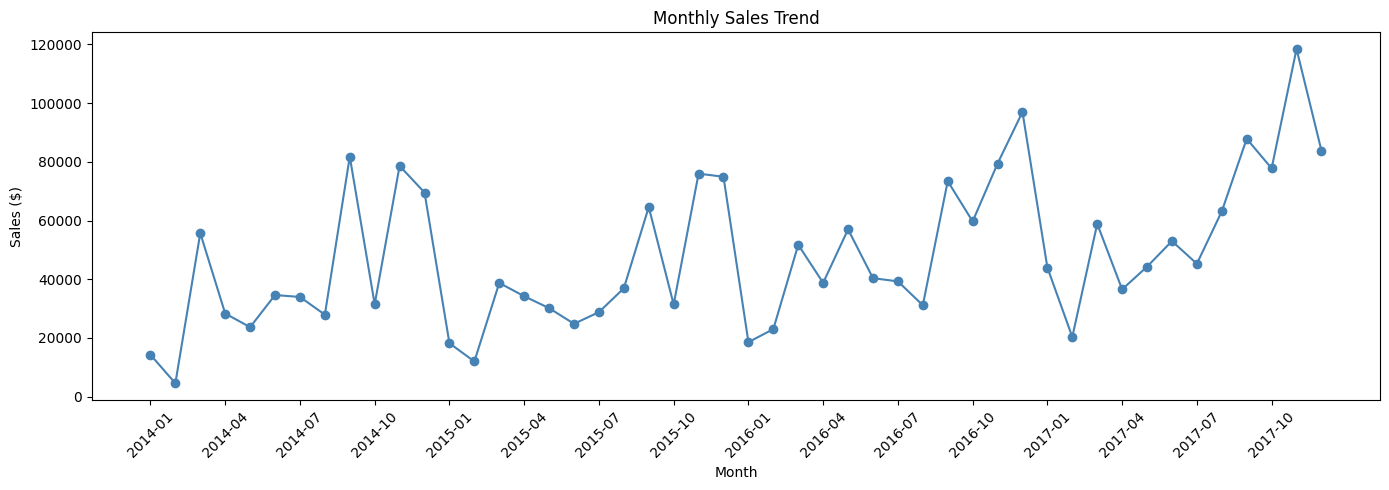

In [13]:
plt.figure(figsize=(14, 5))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', color='steelblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')

# FIX: Show every 3rd label to avoid crowding on x-axis
plt.xticks(
    ticks=range(0, len(monthly_sales), 3),
    labels=monthly_sales['Order Date'][::3],
    rotation=45
)

plt.tight_layout()
plt.savefig('sales_trend.png')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Create numeric month index as feature
monthly_sales['Month_Index'] = range(len(monthly_sales))

X = monthly_sales[['Month_Index']]
y = monthly_sales['Sales']

# Split into training (80%) and testing (20%) — NO shuffle for time series!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
predictions = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error : ${mae:.2f}")
print(f"Root Mean Sq. Error : ${rmse:.2f}")
print(f"Model Slope         : {model.coef_[0]:.2f}  (sales change per month)")
print(f"Model Intercept     : {model.intercept_:.2f}")

Training samples: 38, Testing samples: 10
Mean Absolute Error : $18041.64
Root Mean Sq. Error : $23416.38
Model Slope         : 699.55  (sales change per month)
Model Intercept     : 29907.29


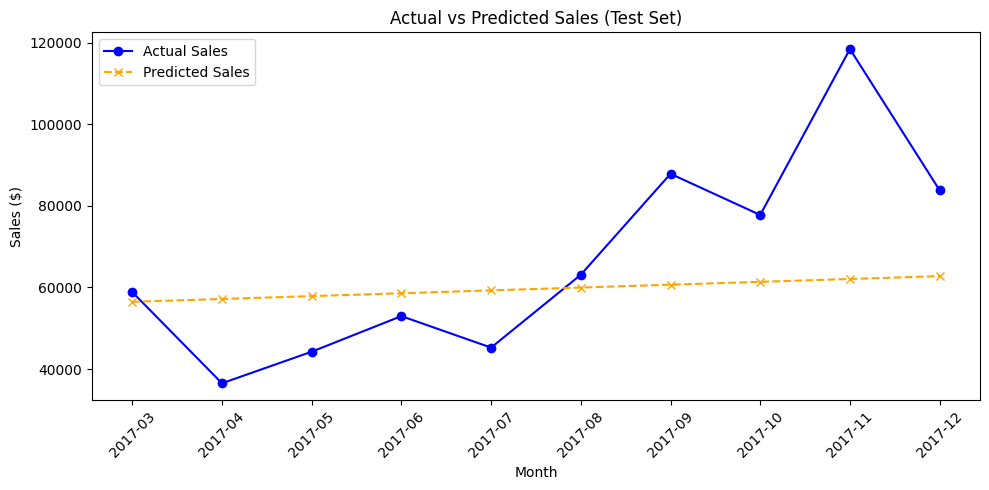

In [15]:
test_months = monthly_sales['Order Date'].iloc[-len(y_test):].values

plt.figure(figsize=(10, 5))
plt.plot(test_months, y_test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(test_months, predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

In [16]:
import pandas as pd

last_index = monthly_sales['Month_Index'].max()
last_date = pd.to_datetime(monthly_sales['Order Date'].iloc[-1])

# Create future month indices
future_months = pd.DataFrame({'Month_Index': [last_index+1, last_index+2, last_index+3]})

# Generate future month labels
future_labels = [(last_date + pd.DateOffset(months=i)).strftime('%Y-%m') for i in range(1, 4)]

# Predict
future_predictions = model.predict(future_months)

print("Forecasted Sales for Next 3 Months:")
for label, val in zip(future_labels, future_predictions):
    print(f"  {label}: ${val:,.2f}")

Forecasted Sales for Next 3 Months:
  2018-01: $63,485.52
  2018-02: $64,185.07
  2018-03: $64,884.62
